In [2]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.competition_download_files('dogs-vs-cats',path='../data/raw')

In [16]:
import zipfile 
import os

with zipfile.ZipFile('../data/raw/dogs-vs-cats.zip','r') as file:
    file.extractall('../data/raw/unzipped')

with zipfile.ZipFile('../data/raw/unzipped/test1.zip','r') as file:
    file.extractall('../data/raw/unzipped/test/')


with zipfile.ZipFile('../data/raw/unzipped/train.zip','r') as file:
    file.extractall('../data/raw/unzipped/')

In [6]:
import re
import shutil
import pathlib
cat_folder = 'cat'
dog_folder = 'dog'
x = None
if x:
    for dirname,filename,image in os.walk('../data/raw/unzipped/train'):
        print(f'{len(filename)} is {len(image)} in {dirname}')
        # print(str(image))

        if os.path.exists('data/raw/unzipped/train1'):
            break
        else:
            os.makedirs('data/raw/unzipped/rain1',exist_ok=True)
            for i in image:
                if str(i).split('.')[0] == cat_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/cat')
            
                elif str(i).split('.')[0] == dog_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/dog')
                
    

In [8]:
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms,models

In [9]:
train_dataset = datasets.ImageFolder('../data/raw/unzipped/train1')

In [12]:
train_dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [25]:
test_dataset = datasets.ImageFolder('../data/raw/unzipped/test')

In [26]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 12500
    Root location: ../data/raw/unzipped/test

In [34]:
img,label = train_dataset[0]

In [48]:
TRAIN_SIZE = int((len(train_dataset)*0.8))
VALIDATION_SIZE = int(len(train_dataset)*0.2)

In [49]:
TRAIN_SIZE

20000

In [50]:
train_dataset,validatiom_dataset = torch.utils.data.random_split(train_dataset,[TRAIN_SIZE,VALIDATION_SIZE])

In [55]:
img,label = validatiom_dataset[0]

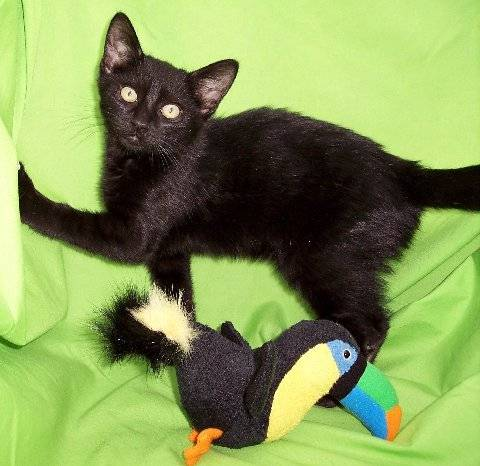

In [56]:
img